In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Churn_Modelling (1).csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#dropping insignificant variables
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
#nomissingvalues
#encoding 
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Geography"]=df["Geography"].astype("category")
df["Geography"]=df["Geography"].cat.codes

In [10]:
df=pd.get_dummies(df,columns=["Geography"],dtype=int)

In [11]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df["Gender"]=df["Gender"].astype("category")
df["Gender"]=df["Gender"].cat.codes

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
df=df.drop(columns=["Geography_0"])

In [15]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
#checking for outliers
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


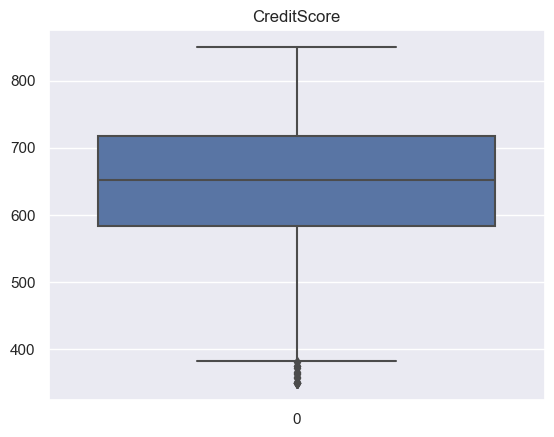

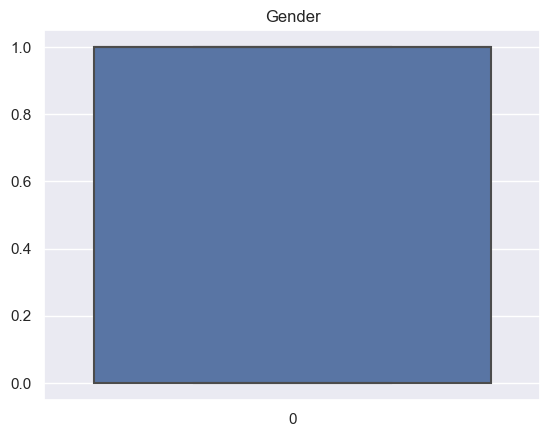

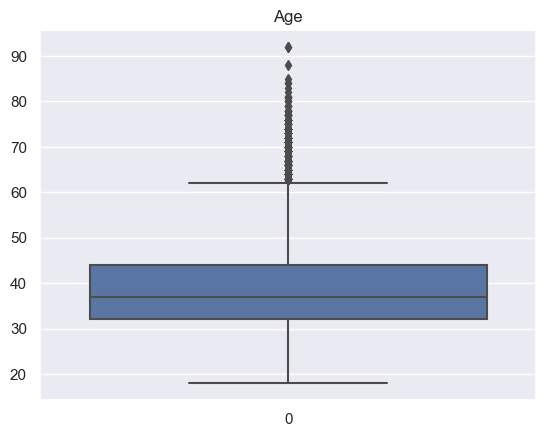

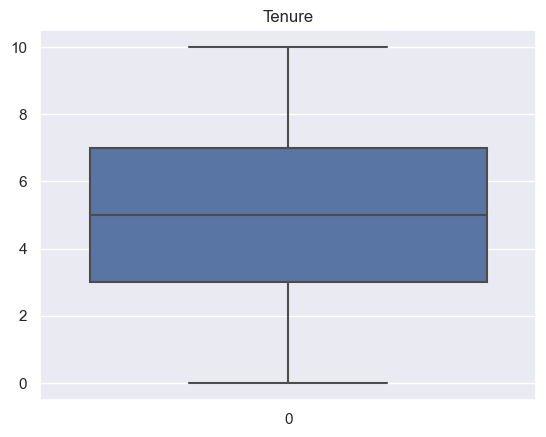

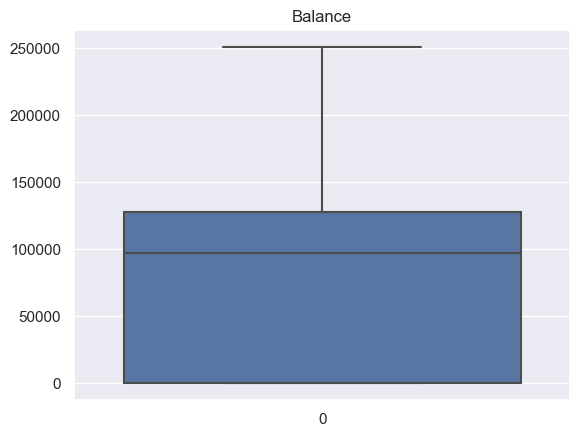

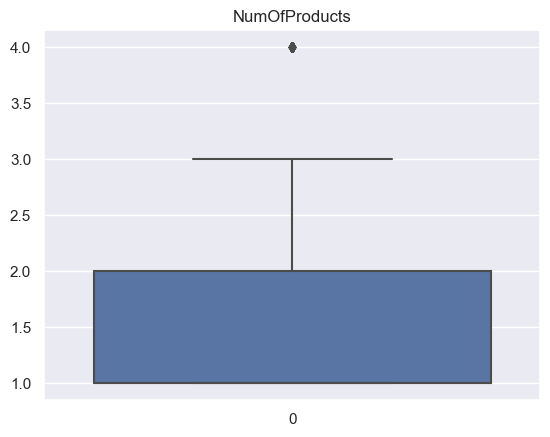

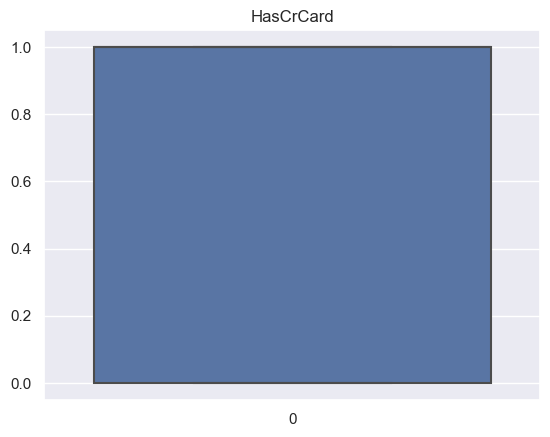

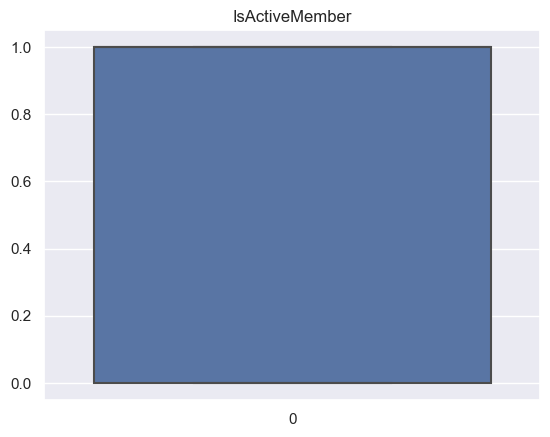

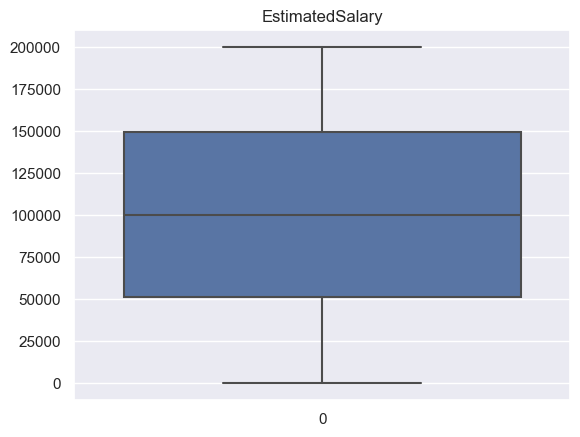

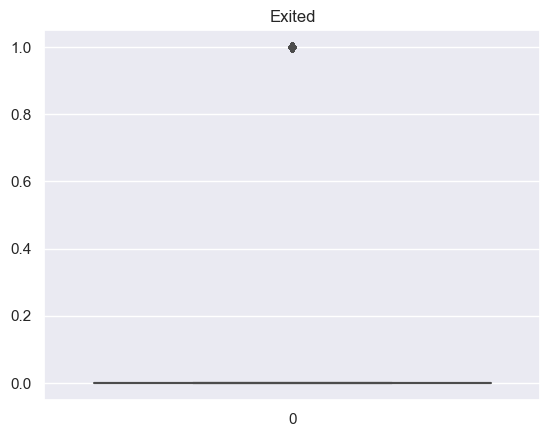

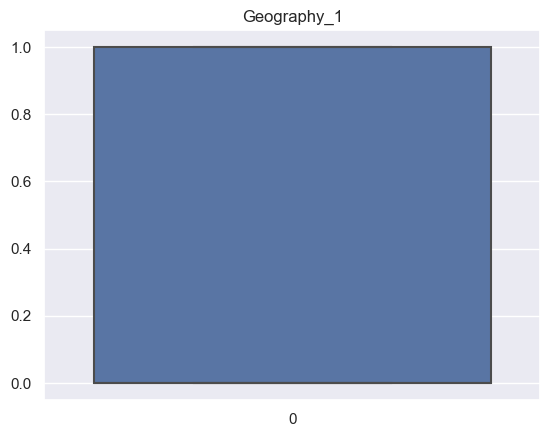

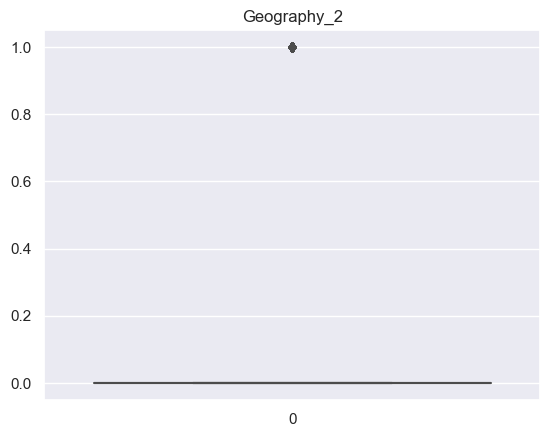

In [17]:
def boxplots(cols):
    sns.boxplot(df[cols])
    plt.title(f"{cols}")
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)


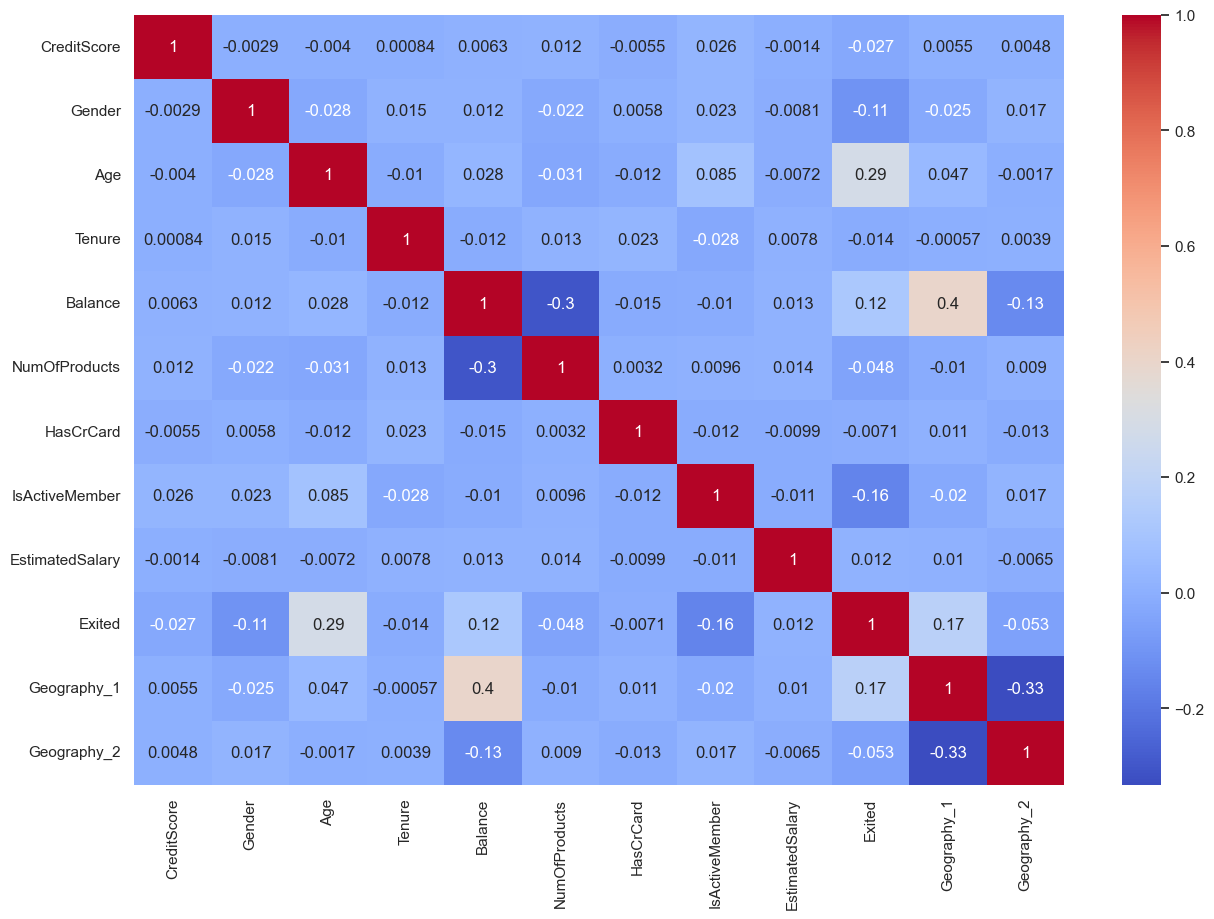

In [18]:
#EDA
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

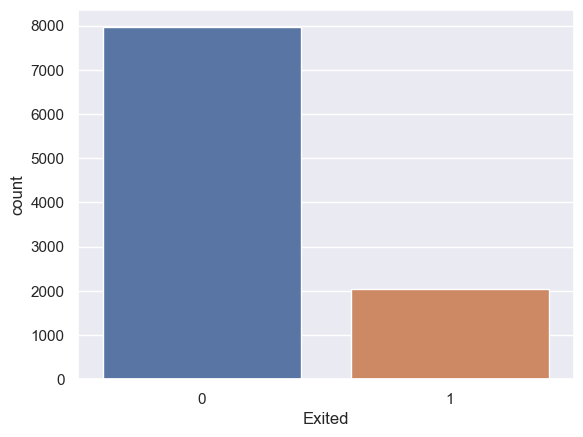

In [19]:
sns.countplot(data=df,x=df["Exited"])
plt.show()

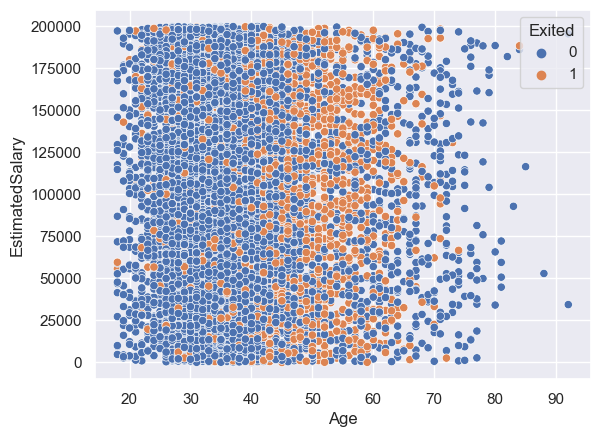

In [20]:
sns.scatterplot(data=df,x=df["Age"],y="EstimatedSalary",hue="Exited")
plt.show()

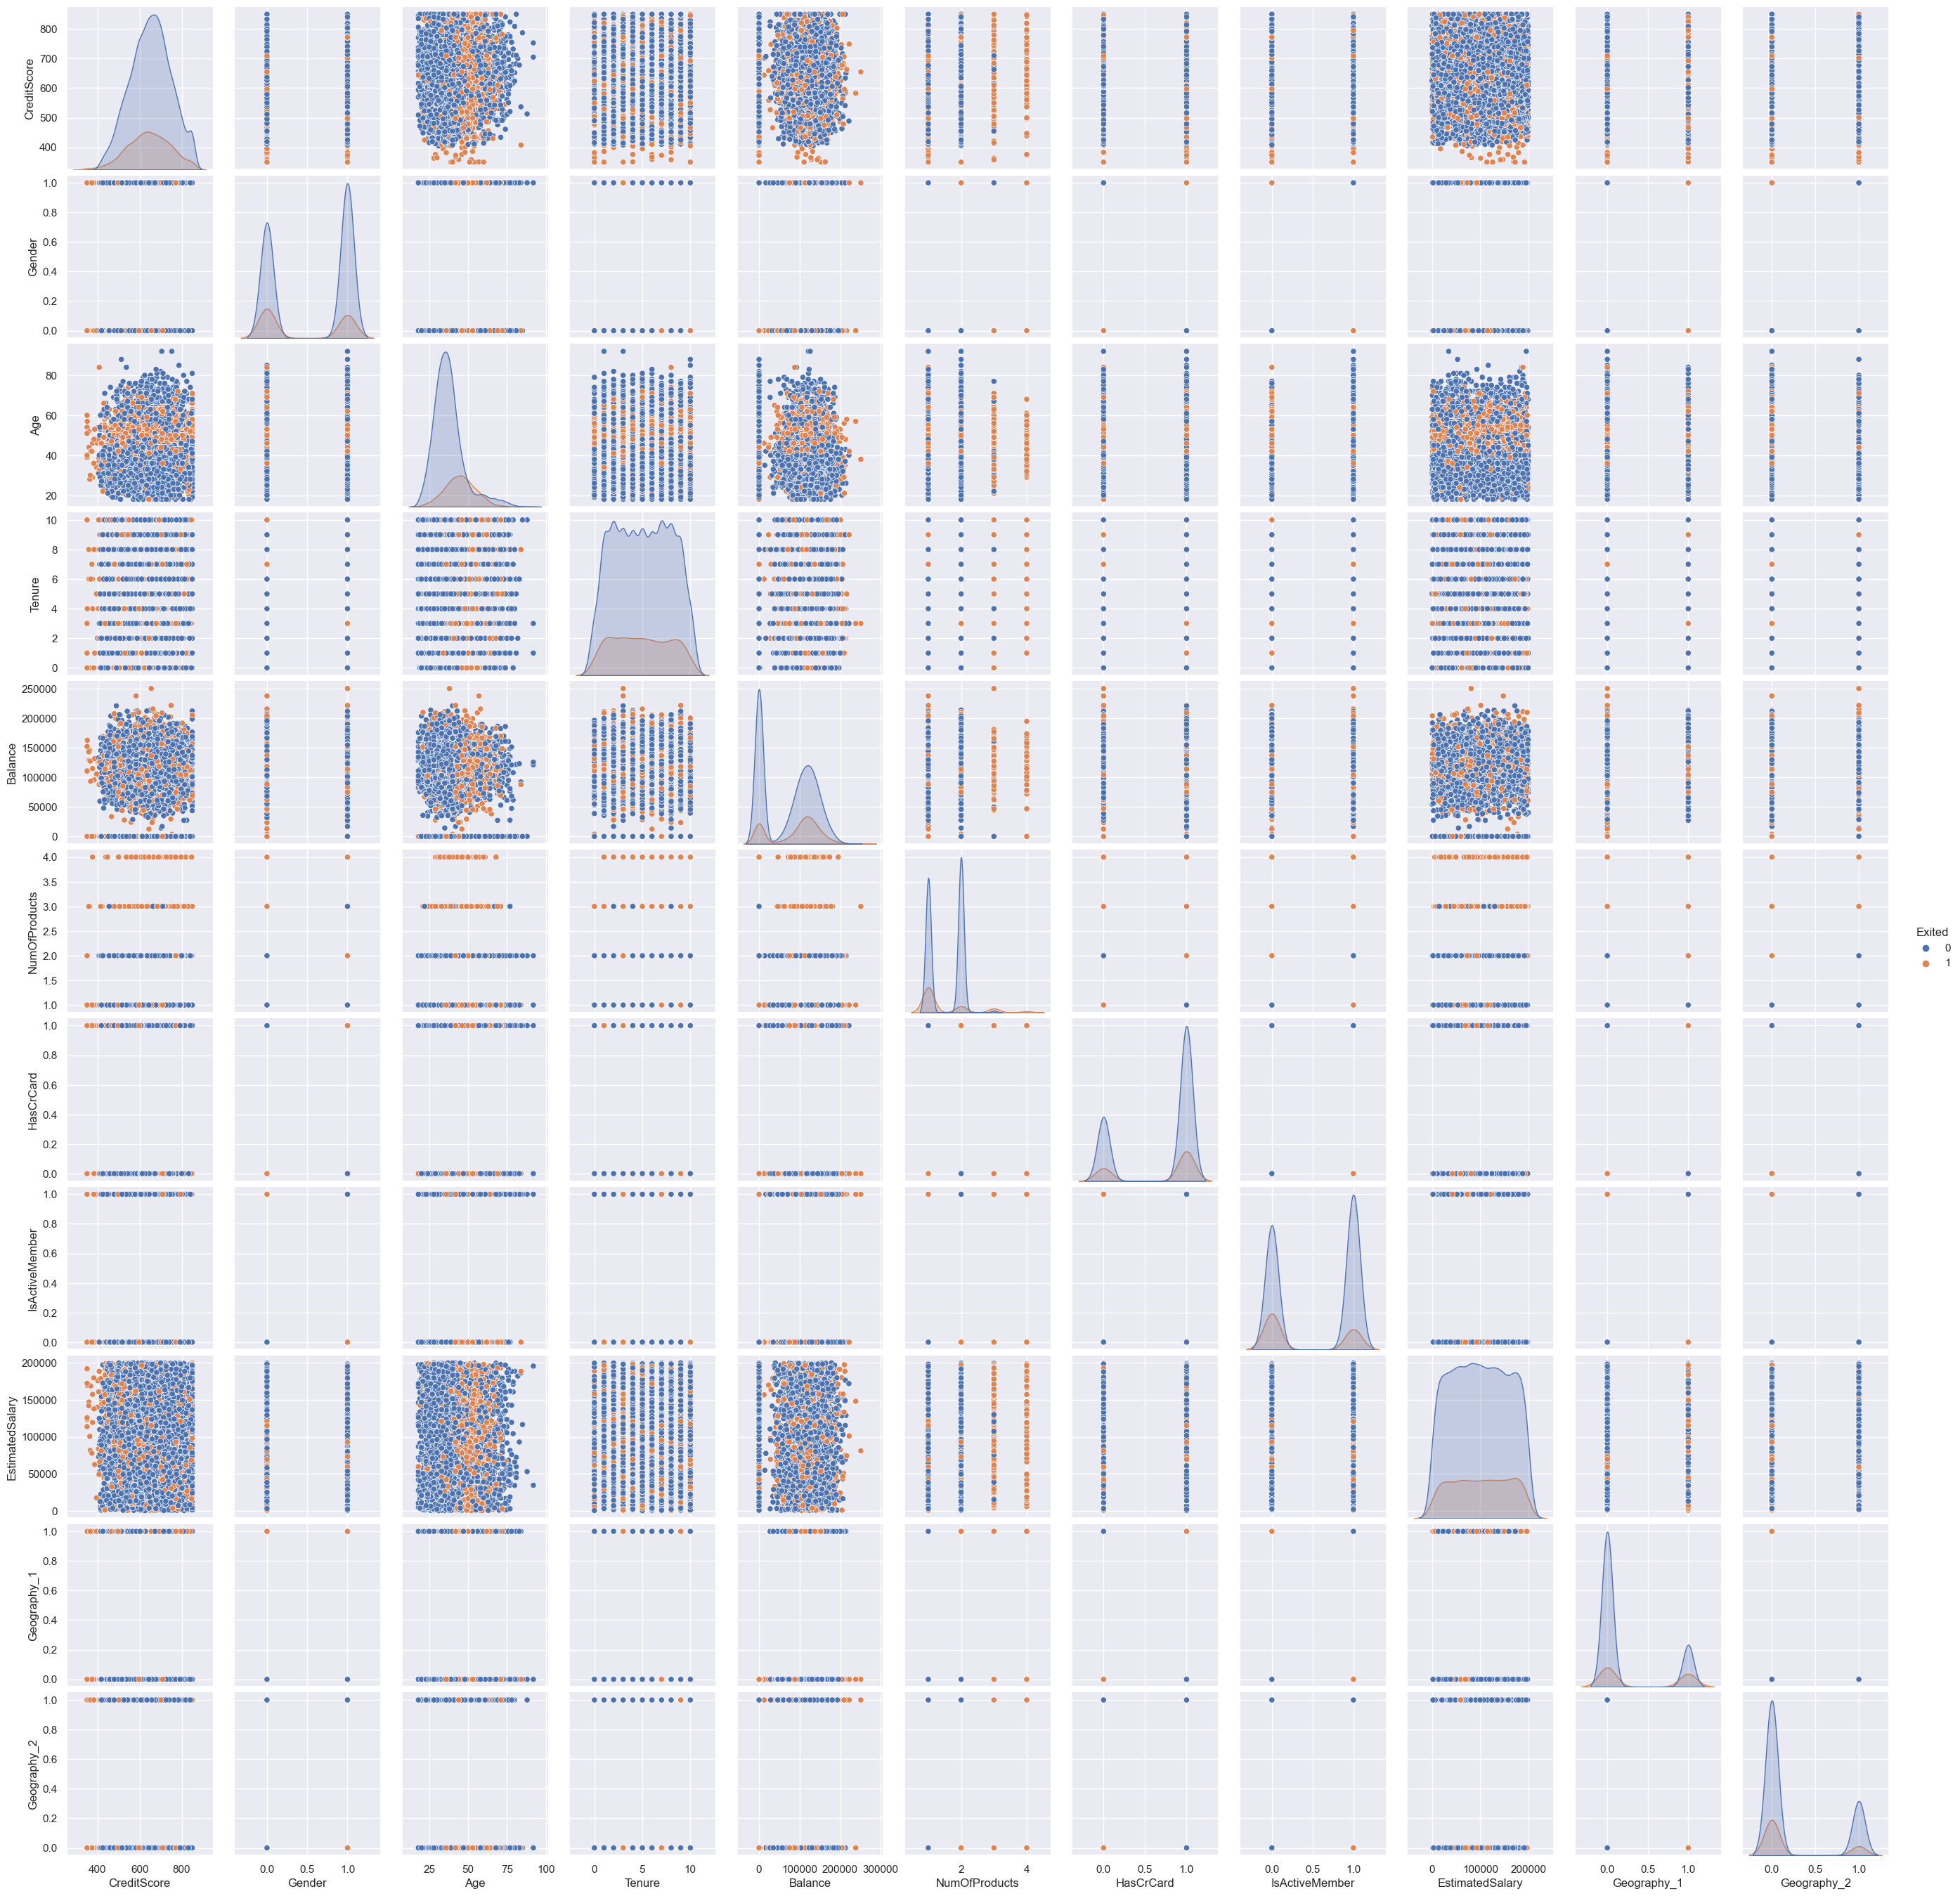

In [21]:
sns.pairplot(data=df,hue="Exited")
plt.show()

In [22]:
#nooutliers
#splitting into dv and idv
x=df.drop(columns=["Exited"])
y=df[["Exited"]]

In [23]:
#checking if data is balanced
y.value_counts()


Exited
0         7963
1         2037
Name: count, dtype: int64

In [24]:
x.shape

(10000, 11)

In [25]:
y.shape

(10000, 1)

In [26]:
#data is imbalanced, hence performing imbalanced treatment
from imblearn.over_sampling import RandomOverSampler
RO=RandomOverSampler()
x_over,y_over=RO.fit_resample(x,y)

In [27]:
x_over.shape

(15926, 11)

In [28]:
y_over.shape

(15926, 1)

In [29]:
y_over.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

In [196]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(sc_x)
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sc_x,y_over,test_size=0.25,random_state=100)

In [197]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [198]:
y_pred_train_logit=logit.predict(x_train)
y_pred_test_logit=logit.predict(x_test)

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [200]:
print(accuracy_score(y_pred_train_logit,y_train))
print("*********************************************************************")
print(accuracy_score(y_pred_test_logit,y_test))

0.705040187541862
*********************************************************************
0.6991461577096936


In [201]:


print(confusion_matrix(y_pred_train_logit,y_train))
print("*********************************************************************")
print(confusion_matrix(y_pred_test_logit,y_test))

[[4383 1873]
 [1650 4038]]
*********************************************************************
[[1392  660]
 [ 538 1392]]


In [202]:
print(classification_report(y_pred_train_logit,y_train))
print("*********************************************************************")
print(classification_report(y_pred_test_logit,y_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      6256
           1       0.68      0.71      0.70      5688

    accuracy                           0.71     11944
   macro avg       0.70      0.71      0.70     11944
weighted avg       0.71      0.71      0.71     11944

*********************************************************************
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2052
           1       0.68      0.72      0.70      1930

    accuracy                           0.70      3982
   macro avg       0.70      0.70      0.70      3982
weighted avg       0.70      0.70      0.70      3982



In [203]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [204]:
y_pred_train_dt=dt.predict(x_train)
y_pred_test_dt=dt
.predict(x_test)

SyntaxError: invalid syntax (1223543761.py, line 3)

In [205]:
print(accuracy_score(y_pred_train_dt,y_train))
print("*********************************************************************")
print(accuracy_score(y_pred_test_dt,y_test))

1.0
*********************************************************************
0.9168759417378202


In [206]:
print(confusion_matrix(y_pred_train_dt,y_train))
print("*********************************************************************")
print(confusion_matrix(y_pred_test_dt,y_test))

[[6033    0]
 [   0 5911]]
*********************************************************************
[[1637   38]
 [ 293 2014]]


In [207]:
print(classification_report(y_pred_train_dt,y_train))
print("*********************************************************************")
print(classification_report(y_pred_test_dt,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6033
           1       1.00      1.00      1.00      5911

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944

*********************************************************************
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1675
           1       0.98      0.87      0.92      2307

    accuracy                           0.92      3982
   macro avg       0.91      0.93      0.92      3982
weighted avg       0.93      0.92      0.92      3982



In [208]:
dt.feature_importances_


array([0.12272063, 0.0198448 , 0.24902719, 0.06761188, 0.17214435,
       0.13212958, 0.01376605, 0.03668796, 0.15425283, 0.02112708,
       0.01068765])

In [209]:
pd.DataFrame(index=x.columns, data=dt.feature_importances_, columns=['Feature Importance'])

,Feature Importance
CreditScore,0.122721
Gender,0.019845
Age,0.249027
Tenure,0.067612
Balance,0.172144
NumOfProducts,0.132130
HasCrCard,0.013766
IsActiveMember,0.036688
EstimatedSalary,0.154253
Geography_1,0.021127


In [210]:
def report_model(model):
    model_preds = model.predict(x_test)
    model_preds_train = model.predict(x_train)
    print(classification_report(y_test, model_preds))
    print(accuracy_score(y_test, model_preds))
    print(accuracy_score(y_train, model_preds_train))

In [211]:
prunned_dtree = DecisionTreeClassifier(max_depth=11)
prunned_dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [212]:
report_model(prunned_dtree)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1930
           1       0.82      0.87      0.84      2052

    accuracy                           0.83      3982
   macro avg       0.84      0.83      0.83      3982
weighted avg       0.84      0.83      0.83      3982

0.8347564038171773
0.8851306095110516


In [213]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(prunned_dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(prunned_dtree, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

0.8261050019974349

0.7895442122895178
